<a href="https://colab.research.google.com/github/majharul/electrical_machin-s-Behavior-Predicton/blob/main/Machines's_behaviour_optimumPerformance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Suppose we have an electrically operated general purpose industrial machine (i.e Generator, Motor, Electrical Machines) which has been purchased for a manufacturing process plant. Typically the machine has to run whole day to remain the prodution process running smoothly. In this work our goal is to plan and design a solution and to execute different machine learning algorithms to compare the performances to predict the machine's life expectency of the respective machine. 

>**if we can predict the next shutdown before a forced shutdown then we can use the machine or run the machine(i.e: Motor) in an optimum condition to achieve maximum life expectency.**




# Specific Challenges
>### Creating a dummy random dataset
>### Data Cleansing and Preporcessing
>### Outliers detection 
>### Ploting and Normalization
>### Finding highly corelative feature that impact the machine Performances
>### Proposing and Appropriate ML algorithm
>### Training and Performace analysis of ML Model
>### Comparing between different ML algorithm
> ### Providing recomendation for life expectency of Generator




# Data Set Property





#Research Papers
1. Said, Nor, and Majid, “Analysis of Distribution Transformer Losses and Life Expectancy Using Measured Harmonic Data.”
2. Ebersbach et al., “Machine Condition Monitoring and Remaining Life Prediction Using Integrated Approach.”

3. Enoch, George, and Aning, “Predicting the Remaining Lifetime of Distribution Transformers Using Machine Learning.”

4. Zhou et al., “Remaining Useful Life Prediction with Similarity Fusion of Multi-Parameter and Multi-Sample Based on the Vibration Signals of Diesel Generator Gearbox.”
5. Wei et al., “Research on Service Life Prediction of Diesel Engine.”

##Related works
>https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine


>https://github.com/gussie/Springboard_data_science/blob/master/Predicting_Life_Expectancy/Project_Life_Expectancy.ipynb

>https://www.kaggle.com/phamvanvung/remaining-useful-life-prognostics/notebook


>https://www.kaggle.com/phamvanvung/remaining-useful-life-prognostics


>https://www.datasciencesociety.net/using-machine-learning-to-explain-and-predict-the-life-expectancy-of-different-countries/

>https://www.kaggle.com/kumarajarshi/life-expectancy-who

>https://www.datasciencesociety.net/using-machine-learning-to-explain-and-predict-the-life-expectancy-of-different-countries/



#Data attributes
the generated data is for an electrical machines(motor for a washing machine plant) 
data has x row and y column
Primary observation. From the dataset we can predict next schedule of maintenance and we will collect the data from a single machines but using similar technique and logging data for same model's multiple machine we can predict life expectency lately. So in this work we will focus on a single machine data to find the next shutdown or to predict the next shutdown/maintenance before it happens forcefully.


Dataset Generation

In [ ]:
## importing necessary library and modules
from sklearn.datasets import make_regression
from matplotlib import pyplot
# from matplotlib import pyplot
from pandas import DataFrame
import pandas as pd

# generate regression dataset
X, y = make_regression(n_samples=180, n_features=15, noise=0.3)
# plot regression dataset
# pyplot.scatter(X,y)
# pyplot.show()

# df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
y.shape
df = DataFrame(X)
df['Output']=y


# Dummy Timestamp data for 100 days
Generating dummy time data for  100 days. In this work we are trying to provide a 100days data of a single machine. So data has been collected each day once for 100days .
So lets generate dummy timestamps and add as a column to the generated dataset

In [ ]:
dti = pd.date_range("2018-01-01", periods=180, freq="D")
dti

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-06-20', '2018-06-21', '2018-06-22', '2018-06-23',
               '2018-06-24', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', length=180, freq='D')

In [ ]:
#addinng to the data
df['date']=dti
df.head()
# df.to_csv('dummy.csv')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Output,date
0,-0.085031,-0.131439,-0.981597,0.466616,1.125033,-0.529540,0.651901,-0.687695,-0.386532,-1.213713,-0.177537,-0.327856,-0.026396,1.456121,-0.052009,-150.751751,2018-01-01
1,-1.046994,1.351446,1.071931,1.746896,0.502593,-1.277054,-0.781047,-0.119050,-0.690915,-1.505921,0.462789,0.810695,0.773208,1.146707,0.808817,148.819269,2018-01-02
2,-1.635786,0.990072,0.877212,0.162816,-0.252778,-0.944640,-0.003198,0.437257,-0.907201,-0.961372,-0.214852,-1.521362,0.599153,0.801212,-0.607189,-176.871268,2018-01-03
3,-0.321120,0.210341,0.030298,0.072823,-0.243195,1.196390,0.052189,0.740779,0.380301,-1.122430,-0.025117,-1.241069,-1.074834,0.346232,0.591273,-41.650983,2018-01-04
4,-0.277049,2.405748,0.231918,0.336120,-0.402442,-0.283973,-0.459352,0.859903,-1.016970,-0.934296,-1.155953,0.441118,0.743920,-1.009405,-0.923239,-18.672067,2018-01-05


# Playing with Attributes
As we have generated 10 attributes of the machine to test the hyposthesis  of machine learning based prediction, at this moment we will just create relevant realistics patter of the randomly generaed data for regression analysis.
so lets add attribute coulumn names of the industrial motor.

#Typical Properties of a Motor
> Machien should have rated specification
> machine has been designed to run its full life span if the motor(i.e machine) runs in an degisnated optimum environment and loading capacity.
For a motor, it has mainly few mandatory data embedded in its nameplate for examaple
1. Rated Capacity(kW)
2. Efficiency(%)
3. Encloser Type (i.e IP55 , IP66)
4. Operating Temperature (say 40^o - 50 Degree Celcious)
5. Speed(RPM)
#Additional Considerations
##Besides the nameplate data in actuall running condition we need to observe othes data as well
1. Running Speed
2. Vibration
3. Sound and noise level
4. Hermonics
5. Input Current
6. Load (kW)
7. Running Efficiency
8. Room temperature and Body temperarute
9. Room Humudity
10. If any oil or debris is being leaked or not
11. Status of the machine (either running or stroped)

#Further Data COllection 
To model and predict a machine performances we need more data like possible shutdown or damaging info

1. Either machine is running or not aka status of the machine
2. if it has been shutted down forcefully or naturally due to off production
3. If forcefully then reson for it
4. Part ID or sensor that has been last repaired
5. downtime

#Main Concept of SUPERVISED model data
## The main idea to model machine data to predict next forced shutdown
The main idea that we will have data for 100days approximately to check how the machine behave daily. 
for example when the machine run on full load for a certain days then is it creating forceshutdown or is there any part get damaged or not.
what is the impact of temperature and humidity before the shutdown of the machine.
what impact does it have on harmonics
how long full load efficiecny can be achived before a forcedshutdown


Depending on this data we will get an idea which attribute has highest corelation for the shutdown or downtime.


depending on that we will model using two or three machine learning model.

if we can predict the next shutdown before the forced shutdown then we can use the machine in an optimum condition to achine maximum life expectency.

In [ ]:
df.describe

<bound method NDFrame.describe of             0         1         2  ...        14      Output       date
0   -0.085031 -0.131439 -0.981597  ... -0.052009 -150.751751 2018-01-01
1   -1.046994  1.351446  1.071931  ...  0.808817  148.819269 2018-01-02
2   -1.635786  0.990072  0.877212  ... -0.607189 -176.871268 2018-01-03
3   -0.321120  0.210341  0.030298  ...  0.591273  -41.650983 2018-01-04
4   -0.277049  2.405748  0.231918  ... -0.923239  -18.672067 2018-01-05
..        ...       ...       ...  ...       ...         ...        ...
175 -0.717736 -0.581659 -0.822426  ... -1.966677 -237.609634 2018-06-25
176 -0.150263 -0.850009  1.284221  ...  0.126215   68.729714 2018-06-26
177 -1.826961 -1.351387  3.204133  ...  0.216952  485.234916 2018-06-27
178  2.347456  0.645258 -1.338506  ... -1.175436 -172.111926 2018-06-28
179 -0.379772  0.625162  0.604705  ... -1.094068  240.968219 2018-06-29

[180 rows x 17 columns]>

In [ ]:
df.shape

(180, 17)

In [ ]:
df.size

3060

In [ ]:
corrMatrix = df.corr()
corrMatrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Output
0,1.000000,0.024402,0.008195,0.005842,-0.060518,0.074579,-0.062133,-0.037605,0.019292,0.096219,-0.006550,-0.059709,0.068666,-0.090864,-0.040011,0.182511
1,0.024402,1.000000,-0.097245,0.075239,0.015508,-0.052823,0.091259,-0.004794,-0.140718,-0.037315,-0.048912,-0.247768,-0.078297,0.077541,0.036417,-0.144561
2,0.008195,-0.097245,1.000000,0.101217,0.017731,-0.083699,-0.031268,0.063539,-0.028234,0.018209,-0.089059,0.004506,-0.028323,-0.033335,0.012573,0.300384
3,0.005842,0.075239,0.101217,1.000000,-0.056708,-0.019544,-0.113188,0.083977,-0.014369,0.027381,0.149195,-0.043710,-0.023278,0.003325,0.023248,0.170617
4,-0.060518,0.015508,0.017731,-0.056708,1.000000,0.058953,0.063851,-0.029188,-0.018755,0.025497,-0.116297,-0.068431,-0.125407,-0.052133,0.004978,-0.102106
5,0.074579,-0.052823,-0.083699,-0.019544,0.058953,1.000000,0.026019,0.054374,0.030928,-0.050815,0.028444,0.053836,0.059465,0.006269,0.023439,0.316395
6,-0.062133,0.091259,-0.031268,-0.113188,0.063851,0.026019,1.000000,-0.072915,-0.020989,-0.032098,0.060061,-0.046483,-0.002403,-0.035716,0.018493,0.263597
7,-0.037605,-0.004794,0.063539,0.083977,-0.029188,0.054374,-0.072915,1.000000,0.052885,0.042354,-0.050220,-0.048047,0.058753,0.018847,-0.123726,0.322734
8,0.019292,-0.140718,-0.028234,-0.014369,-0.018755,0.030928,-0.020989,0.052885,1.000000,0.019047,0.049283,0.110089,-0.069239,-0.067097,0.098651,0.079951
9,0.096219,-0.037315,0.018209,0.027381,0.025497,-0.050815,-0.032098,0.042354,0.019047,1.000000,0.018830,-0.099574,-0.078891,-0.172220,0.075043,-0.020965


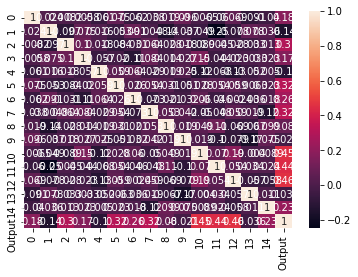

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix, annot=True)
plt.show()

@# As the atribute shows that there a lot of data has low corelation with the output. lets clean and remove some attributes to find the highest corelated data properties or columns

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


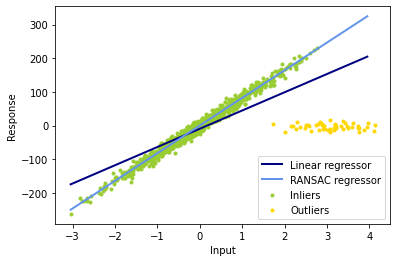

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

#Final MS Excel is Guru 
Different appoaches after a economical way to find random data from Microsoft Excel

#Load important library and start playing with Code and data


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
# Loading Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [167]:
#reading Data From The Google Drive
life_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Motor_status.csv', sep = ',')

In [168]:
life_data.head()

,date,Minimum Avg Load,Oil and Debris,AvgSpeed,Noise,Power Factor,DailyRunTime,Efficiency,AvgTemperature,Input Current,InputVoltage,Humidity,Vibration,StatusCode,Verdict
0,7/31/2009,7.0,0.27,0.36,20.7,0.5643,15.84,77.22,33.66,15.84,446.49,0.45,4.09464,6,Not Standard Running
1,8/1/2009,6.3,0.30,0.34,1.6,0.4860,22.77,81.18,36.63,9.90,366.30,0.49,4.04415,6,Not Standard Running
2,8/2/2009,8.1,0.28,0.40,6.9,0.8190,22.77,78.21,40.59,19.80,395.01,0.44,3.89961,6,Not Standard Running
3,8/3/2009,7.2,0.23,0.32,8.5,0.8550,8.91,63.36,41.58,13.86,441.54,0.40,4.31244,6,Not Standard Running
4,8/4/2009,7.2,0.23,0.32,8.5,0.6930,18.81,57.42,33.66,2.97,374.22,0.40,4.31244,6,Not Standard Running


In [169]:
life_data.describe() 

,Minimum Avg Load,Oil and Debris,AvgSpeed,Noise,Power Factor,DailyRunTime,Efficiency,AvgTemperature,Input Current,InputVoltage,Humidity,Vibration,StatusCode
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.673732,11.990764,74.363795,39.656797,20.724512,420.532717,0.489847,4.169474,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.132250,7.143850,14.417660,5.991545,11.173096,31.250672,0.114126,0.798599,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.450000,0.000000,49.500000,29.700000,1.980000,366.300000,0.220000,2.554200,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.558000,5.940000,62.370000,34.650000,10.890000,394.020000,0.410000,3.564000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.675000,11.880000,74.250000,39.600000,20.790000,420.750000,0.470000,4.102560,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.792000,17.820000,87.120000,44.550000,30.690000,447.480000,0.550000,4.698540,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.900000,23.760000,99.000000,49.500000,39.600000,475.200000,1.080000,6.930000,9.000000


In [170]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              4898 non-null   object 
 1   Minimum Avg Load  4898 non-null   float64
 2   Oil and Debris    4898 non-null   float64
 3   AvgSpeed          4898 non-null   float64
 4   Noise             4898 non-null   float64
 5   Power Factor      4898 non-null   float64
 6   DailyRunTime      4898 non-null   float64
 7   Efficiency        4898 non-null   float64
 8   AvgTemperature    4898 non-null   float64
 9   Input Current     4898 non-null   float64
 10  InputVoltage      4898 non-null   float64
 11  Humidity          4898 non-null   float64
 12  Vibration         4898 non-null   float64
 13  StatusCode        4898 non-null   int64  
 14  Verdict           4898 non-null   object 
dtypes: float64(12), int64(1), object(2)
memory usage: 574.1+ KB


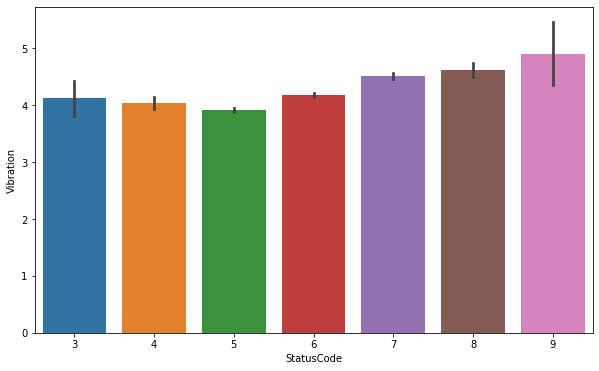

In [171]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'StatusCode', y = 'Vibration', data = life_data)

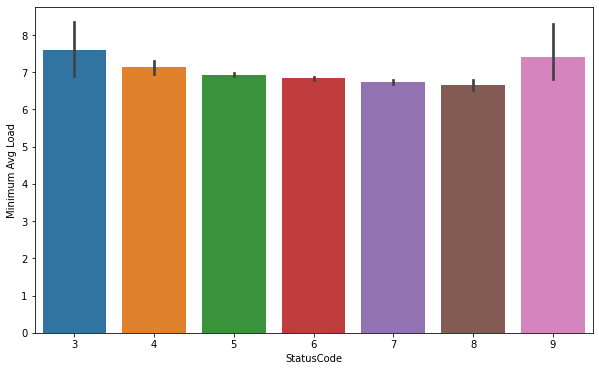

In [172]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'StatusCode', y = 'Minimum Avg Load', data = life_data)

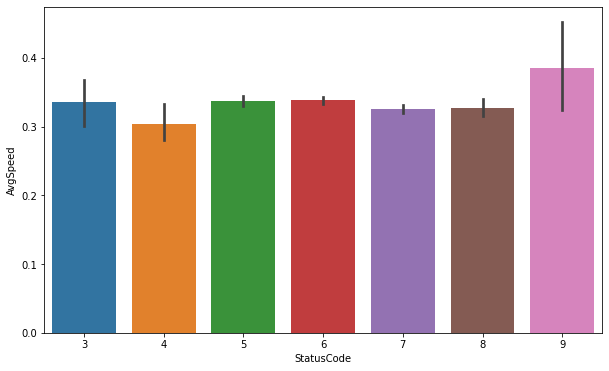

In [173]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'StatusCode', y = 'AvgSpeed', data = life_data)

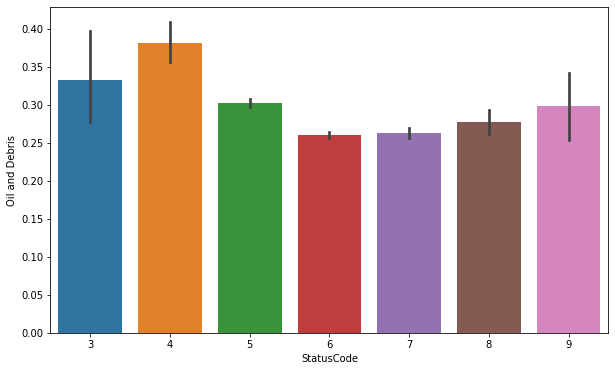

In [174]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'StatusCode', y = 'Oil and Debris', data = life_data)

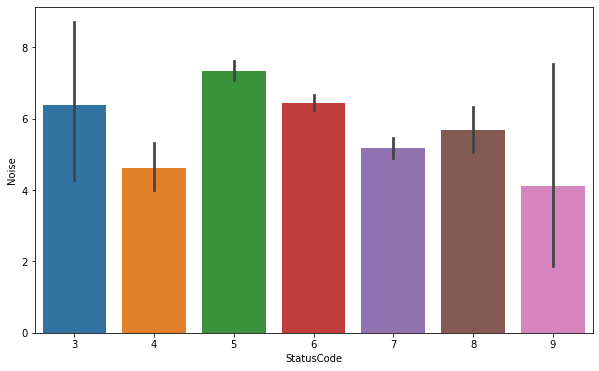

In [175]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'StatusCode', y = 'Noise', data = life_data)

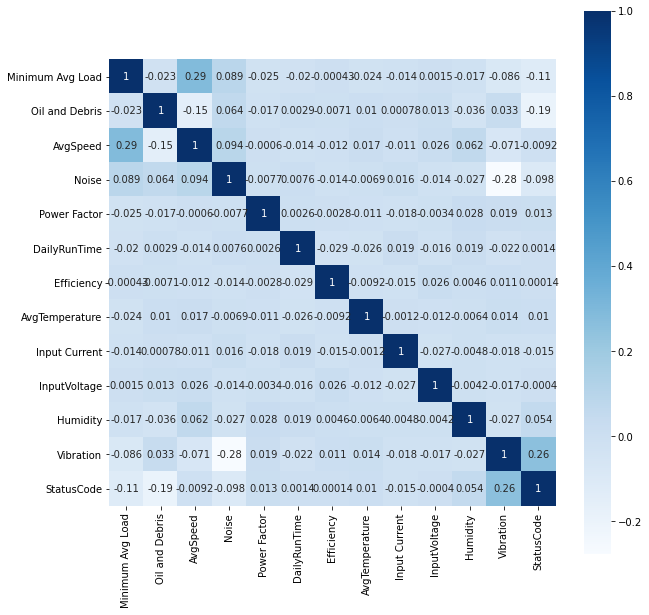

In [176]:
correlation = life_data.corr()

import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

In [177]:
life_data.columns

Index(['date', 'Minimum Avg Load', 'Oil and Debris', 'AvgSpeed', 'Noise',
       'Power Factor', 'DailyRunTime', 'Efficiency', 'AvgTemperature',
       'Input Current', 'InputVoltage', 'Humidity', 'Vibration', 'StatusCode',
       'Verdict'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


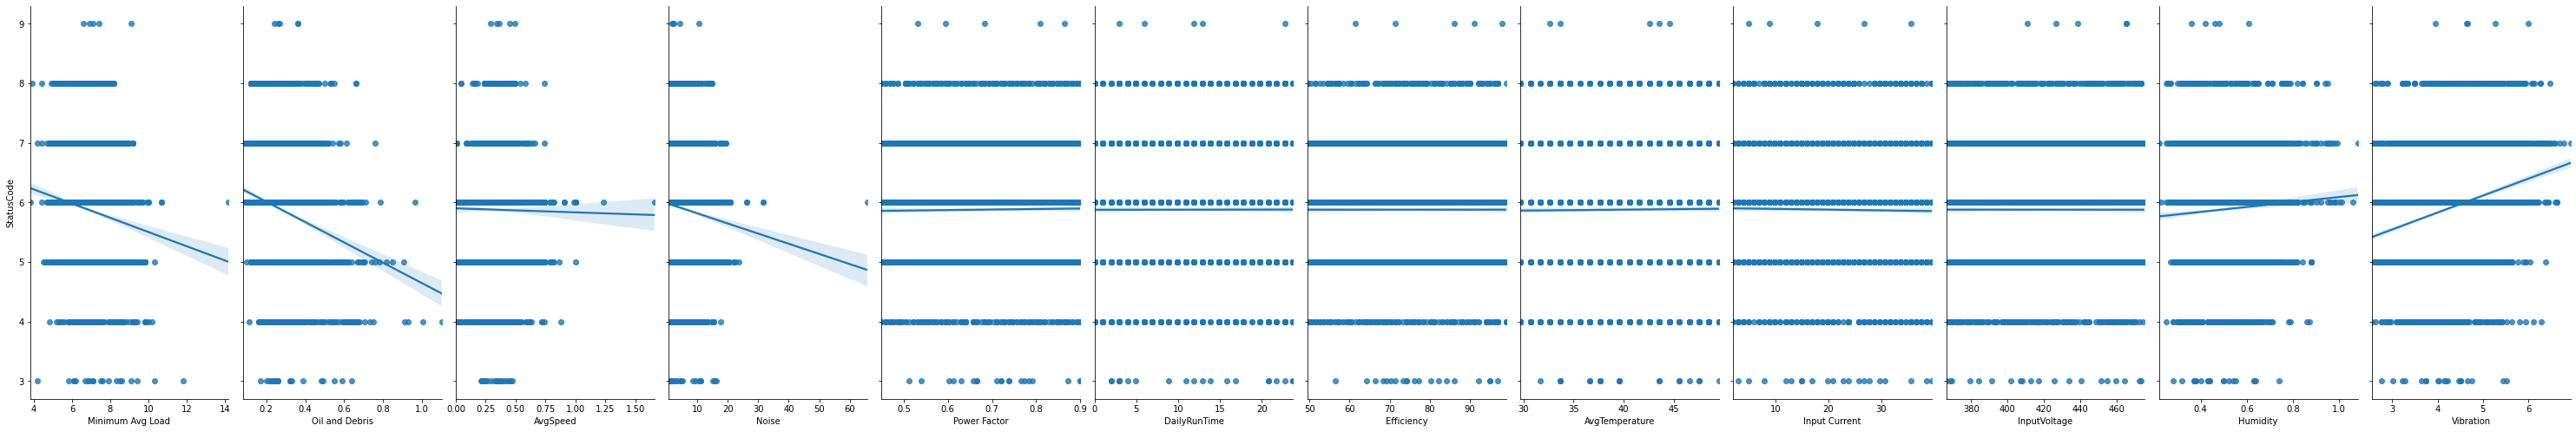

In [178]:
###Linear Regression analysis
features = ['Minimum Avg Load', 'Oil and Debris', 'AvgSpeed', 'Noise',
       'Power Factor', 'DailyRunTime', 'Efficiency', 'AvgTemperature',
       'Input Current', 'InputVoltage', 'Humidity', 'Vibration']
x = life_data[features]
y = life_data['StatusCode']
#plotting features vs quality
sns.pairplot(life_data,x_vars=features,y_vars='StatusCode',kind='reg',size=7,aspect=0.5)

In [179]:

##regression
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [180]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
accuracy = regressor.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 12%'

So upto this we loaded our randomly generated dataset and lately we extracted feature and the statuscode of the machien as output.
we trained the featrues or motor paramter to compare performance prediction status code as output. but as our dataset is completely random there was an approximate 12% of accuracy.


In [216]:
life_data

,Minimum Avg Load,Oil and Debris,AvgSpeed,Noise,Power Factor,DailyRunTime,Efficiency,AvgTemperature,Input Current,InputVoltage,Humidity,Vibration,StatusCode,Verdict,status
0,7.0,0.27,0.36,20.7,0.5643,15.84,77.22,33.66,15.84,446.49,0.45,4.09464,6,Not Standard Running,good
1,6.3,0.30,0.34,1.6,0.4860,22.77,81.18,36.63,9.90,366.30,0.49,4.04415,6,Not Standard Running,good
2,8.1,0.28,0.40,6.9,0.8190,22.77,78.21,40.59,19.80,395.01,0.44,3.89961,6,Not Standard Running,good
3,7.2,0.23,0.32,8.5,0.8550,8.91,63.36,41.58,13.86,441.54,0.40,4.31244,6,Not Standard Running,good
4,7.2,0.23,0.32,8.5,0.6930,18.81,57.42,33.66,2.97,374.22,0.40,4.31244,6,Not Standard Running,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.5220,21.78,86.13,36.63,21.78,376.20,0.50,3.43728,6,Not Standard Running,good
4894,6.6,0.32,0.36,8.0,0.8280,11.88,67.32,41.58,32.67,439.56,0.46,3.42144,5,High Risk for Shutdown,good
4895,6.5,0.24,0.19,1.2,0.5130,13.86,58.41,46.53,20.79,471.24,0.46,3.81546,6,Not Standard Running,good
4896,5.5,0.29,0.30,1.1,0.5940,11.88,88.11,37.62,27.72,450.45,0.38,5.70240,7,Moderate Risk,good


## lets add random forest algorith for analysis

In [247]:
life_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Motor_status.csv', sep = ',')
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
# bins = (2, 4, 8)
# group_names = ['bad', 'good']
# life_data['status'] = pd.cut(life_data['StatusCode'], bins = bins, labels = group_names)

life_data.head()

,date,Minimum Avg Load,Oil and Debris,AvgSpeed,Noise,Power Factor,DailyRunTime,Efficiency,AvgTemperature,Input Current,InputVoltage,Humidity,Vibration,StatusCode,Verdict
0,7/31/2009,7.0,0.27,0.36,20.7,0.5643,15.84,77.22,33.66,15.84,446.49,0.45,4.09464,6,Not Standard Running
1,8/1/2009,6.3,0.30,0.34,1.6,0.4860,22.77,81.18,36.63,9.90,366.30,0.49,4.04415,6,Not Standard Running
2,8/2/2009,8.1,0.28,0.40,6.9,0.8190,22.77,78.21,40.59,19.80,395.01,0.44,3.89961,6,Not Standard Running
3,8/3/2009,7.2,0.23,0.32,8.5,0.8550,8.91,63.36,41.58,13.86,441.54,0.40,4.31244,6,Not Standard Running
4,8/4/2009,7.2,0.23,0.32,8.5,0.6930,18.81,57.42,33.66,2.97,374.22,0.40,4.31244,6,Not Standard Running


In [248]:
# rf_data=
life_data.columns
rf_data=life_data.drop(['date','Verdict'], axis=1)

rf_data.head()

,Minimum Avg Load,Oil and Debris,AvgSpeed,Noise,Power Factor,DailyRunTime,Efficiency,AvgTemperature,Input Current,InputVoltage,Humidity,Vibration,StatusCode
0,7.0,0.27,0.36,20.7,0.5643,15.84,77.22,33.66,15.84,446.49,0.45,4.09464,6
1,6.3,0.30,0.34,1.6,0.4860,22.77,81.18,36.63,9.90,366.30,0.49,4.04415,6
2,8.1,0.28,0.40,6.9,0.8190,22.77,78.21,40.59,19.80,395.01,0.44,3.89961,6
3,7.2,0.23,0.32,8.5,0.8550,8.91,63.36,41.58,13.86,441.54,0.40,4.31244,6
4,7.2,0.23,0.32,8.5,0.6930,18.81,57.42,33.66,2.97,374.22,0.40,4.31244,6


In [249]:
life_data=rf_data
X = life_data.drop('StatusCode', axis = 1)
y = life_data['StatusCode']

In [256]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [255]:
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [258]:
life_data['StatusCode'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: StatusCode, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


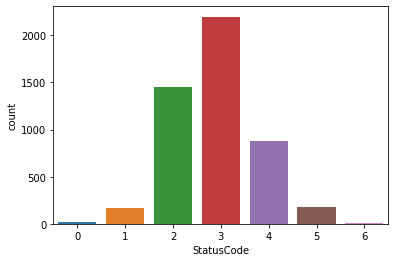

In [238]:
sns.countplot(life_data['StatusCode'])

In [259]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [241]:

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)


In [260]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       1.00      0.04      0.08        25
           5       0.56      0.46      0.51       291
           6       0.50      0.79      0.61       432
           7       0.51      0.15      0.23       192
           8       1.00      0.06      0.11        35

    accuracy                           0.52       980
   macro avg       0.60      0.25      0.26       980
weighted avg       0.55      0.52      0.47       980



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [243]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[  0   0   2   3   0   0]
 [  0   1  12  11   1   0]
 [  0   1 136 150   4   0]
 [  0   0  90 325  17   0]
 [  0   0  25 135  32   0]
 [  0   0   2  26   6   1]]


#Support Vector Machine

In [244]:
#SVM
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [246]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.50      0.34      0.41       291
           6       0.47      0.84      0.60       432
           7       0.44      0.04      0.08       192
           8       0.00      0.00      0.00        35

    accuracy                           0.48       980
   macro avg       0.24      0.20      0.18       980
weighted avg       0.45      0.48      0.40       980



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [261]:
print(confusion_matrix(y_test, pred_svc))

[[  0   0   2   3   0   0]
 [  0   0  13  11   1   0]
 [  0   1 100 189   1   0]
 [  0   0  65 361   6   0]
 [  0   0  15 169   8   0]
 [  0   0   4  29   2   0]]
